## Part 2: Tosco & Spency Data

In [18]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('CE802_P2_Data.csv')

In [20]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.49,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,NaN,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.74,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,NaN,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,NaN,False


### Data Preprocessing

#### Inspecting if all features are numeric or not

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   int64  
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(12), int64(3)
memory usage: 177.4 KB


#### Checking for Nulls/Empty spaces in the feature space

In [22]:
data.isnull().mean()*100

F1        0.0
F2        0.0
F3        0.0
F4        0.0
F5        0.0
F6        0.0
F7        0.0
F8        0.0
F9        0.0
F10       0.0
F11       0.0
F12       0.0
F13       0.0
F14       0.0
F15      50.0
Class     0.0
dtype: float64

In [23]:
# Boolean variables cast implicitly to integers in python, however still it is better to
# convert the boolean Class to numeric for better performance. 

le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   int64  
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   int64  
dtypes: float64(12), int64(4)
memory usage: 187.6 KB


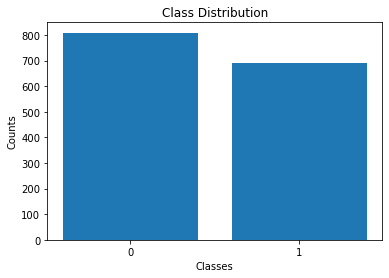

In [26]:
value_counts = data.Class.value_counts()

plt.title('Class Distribution')
plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

#### Classification with Baseline Approach
Removing the feature with null values

In [85]:
X = data.copy().drop(['F15', 'Class'], axis=1)
y = data.Class.values.ravel()

In [86]:
print(X.shape)
print(y.shape)

(1500, 14)
(1500,)


In [87]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=0)

In [88]:
results = []

In [89]:
dummy = DummyClassifier(strategy='most_frequent')
dummy = dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_val)
acc_score = metrics.accuracy_score(y_val, y_pred)
print("Dummy Classifier Accuracy:", acc_score)
results.append(acc_score)

Dummy Classifier Accuracy: 0.5386666666666666


In [90]:
#fitting model with default parameters

DT = DecisionTreeClassifier(random_state=0)
DT = DT.fit(X_train, y_train)
val_res = DT.predict(X_val)
acc_score = metrics.accuracy_score(y_val, val_res)
print("Decision Tree Accuracy:", acc_score)
results.append(acc_score)

Decision Tree Accuracy: 0.736


In [91]:
params = {'criterion': ['entropy', 'gini'],
          'max_depth': [3, 10, 15]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=params, n_jobs=-1)
score = cross_val_score(grid, X, data.Class)
print("Decision Tree Accuracy with Cross-validation: %f (%f)" % (score.mean(), score.std()))
results.append(score.mean())

Decision Tree Accuracy with Cross-validation: 0.760000 (0.014453)


In [92]:
results

[0.5386666666666666, 0.736, 0.76]

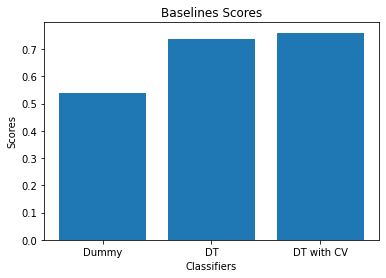

In [93]:
plt.title('Baselines Scores')
x_axis = ['Dummy', 'DT', 'DT with CV']
plt.bar(x_axis, results)
plt.xticks(x_axis)
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.show()

### Classification with different ML Techniques

#### Identifying and Removing Outliers

In [94]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#plot below values

F1        13.0000
F2       540.0000
F3         4.3925
F4        13.9200
F5        27.0000
F6         6.4500
F7       102.0000
F8        11.4600
F9        13.0200
F10        8.7000
F11        1.2300
F12        8.4250
F13      232.0000
F14        4.3600
F15        1.4675
Class      1.0000
dtype: float64


<function matplotlib.pyplot.show>

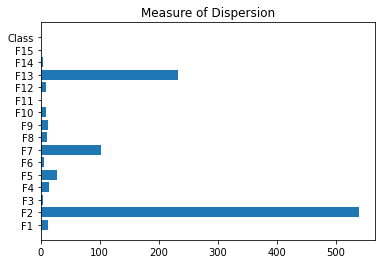

In [95]:
plt.title('Measure of Dispersion')
plt.barh(IQR.index, IQR.values)
plt.show

In [96]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)
data_bkup = data.copy()
data = data_out.copy()

(1259, 16)


In [97]:
X = data.iloc[:,data.columns != 'Class']
y = data.Class.values.ravel()

In [98]:
print(X.shape)
print(y.shape)

(1259, 15)
(1259,)


In [99]:
data.Class.value_counts()

0    649
1    610
Name: Class, dtype: int64

#### Evaluating Different ML Techniques and Models 

In [101]:
models = []
results = []
names = []
fitted_models = []

models.append(('DT', DecisionTreeClassifier(),
               {'criterion': ['entropy', 'gini'], 'max_depth': [None, 10, 15]}))

models.append(('SVC', SVC(gamma=0.01, C=10),
               {'gamma': np.logspace(-7, -0, 5), 'C': np.logspace(-1, 3, 5)}))

models.append(('RFC', RandomForestClassifier(),
               {'n_estimators': np.linspace(100, 300, 5, dtype=int),'max_depth': [None, 10, 15]}))

models.append(('GBC', GradientBoostingClassifier(),
               {'n_estimators': [100, 200, 300],'learning_rate': [0.001, 0.01, 0.1]}))

DT: 0.783931 (0.027550)
SVC: 0.888010 (0.009809)
RFC: 0.864166 (0.009385)
GBC: 0.879273 (0.021064)


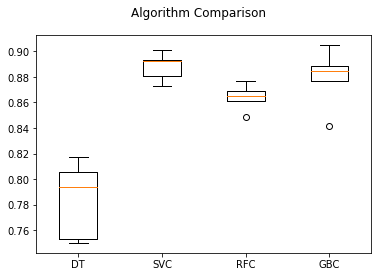

In [102]:
for name, model, classifier_params in models:
    #creating a pipeline for transformation and data fitting.
    pipe = Pipeline(steps=[('imputer', SimpleImputer()),
                       ('scaler', StandardScaler()),
                       ('classifier', model)])
    
    #preparing parameters for parameter tuning in GridSearchCV
    pipe_params = {'scaler__with_std' : [True, False]}
    for param in classifier_params.items():
        pipe_params[f'classifier__{param[0]}'] = param[1]
    
    grid = GridSearchCV(pipe, param_grid=pipe_params, n_jobs=-1)
    grid.fit(X, y)
    
    #Recording results and evaluating a model with best parameters found
    scores = cross_val_score(grid.best_estimator_, X, y, scoring='accuracy')
    results.append(scores)
    names.append(name)
    fitted_models.append(grid.best_estimator_)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Part b: Deploying the Best Performing Pipeline on Testset

In [106]:
testset = pd.read_csv('CE802_P2_Test.csv')

In [107]:
testset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,-4.67,NaN
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,NaN,NaN
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,-6.57,NaN
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,NaN,NaN
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,NaN,NaN


In [108]:
testset.shape

(1500, 16)

In [109]:
testset.Class.isnull().sum()

1500

Implementing the best estimator found in our comparative study

In [112]:
X_test = testset.iloc[:,testset.columns != 'Class']
testset['Class'] = fitted_models[1].predict(X_test)

In [115]:
testset.to_csv('CE802_P2_Test.csv')